In [1]:
import pandas as pd
import os, sys
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))

from utils.prediction_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

random_seed = 42

# Load Data

In [2]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
X, y = get_data("bmm", base_dir, sample_rate=0.3)
X.info()

100%|██████████| 72/72 [07:47<00:00,  6.49s/it]
/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/utils/time_utils.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfs = pd.concat(dfs, axis=0, ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595891 entries, 0 to 5595890
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   b          int64  
 1   n          int64  
 2   m          int64  
 3   p          int64  
 4   gflops     float64
 5   dtype_16   bool   
 6   dtype_32   bool   
 7   dtype_b16  bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 229.5 MB


In [3]:
df = pd.concat([X, y], axis=1)
df.dropna(inplace=True)

In [4]:
X, y = df.drop(columns=["time"]), df["time"]

# Train-Test-Split

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat = False)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2759034 entries, 1072863 to 2526913
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   b          int64  
 1   n          int64  
 2   m          int64  
 3   p          int64  
 4   gflops     float64
 5   dtype_16   bool   
 6   dtype_32   bool   
 7   dtype_b16  bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 134.2 MB


# Fitting

## Decision Tree

Train--------
Mean Squared Error: 1.489926087832193e-06
MAPE: 5.755181759545781e-05
R-squared: 0.9999999999495236


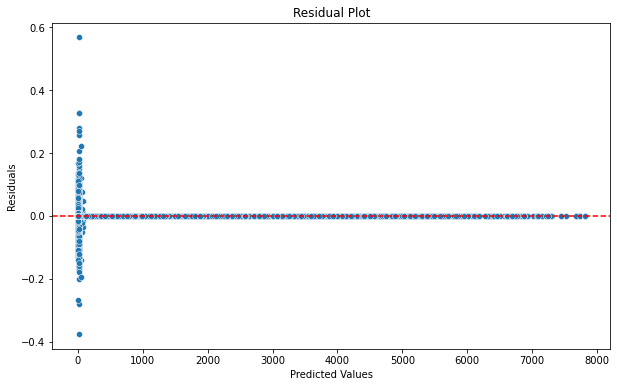

Val--------
Mean Squared Error: 4.544648620661692
MAPE: 0.026386611022444724
R-squared: 0.9998502623486791


In [6]:
tree_model = DecisionTreeRegressor(max_depth=40, random_state=random_seed)
tree_model.fit(X_train, y_train)

y_hat_train = tree_model.predict(X_train)
y_hat_val = tree_model.predict(X_val)

print("Train--------")
get_r2_score(y_train, y_hat_train)
plot_residuals(y_train, y_hat_train)

print("Val--------")
_ = get_r2_score(y_val, y_hat_val)

# plot_residuals(y_val, y_hat_val)

# Save Model

In [7]:
import joblib
# save_dir = os.path.join(base_dir, "final_models", "bmm.pkl")
joblib.dump(tree_model, 'bmm.joblib')

['bmm.joblib']